## Smith Kaart Oefening 4

Gebruik je Smith kaart om een antenne van 150 Ohm aan te passen aan een coax van 50 Ohm voor een frequentie van 600 MHz ($\lambda$= 25 cm; $\epsilon_r$=4)? Welke verschillende oplossingen zijn er mogelijk?

Er zijn hieroor 8 oplossingen mogelijk.

We bespreken hieronder elk van deze 8 oplossing:

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import skrf as rf

### Oplossing 1: Bijplaatsen van een capaciteit in serie

We plaatsen $\frac{Z_L}{Z_0}=3$ op de Smith kaart en we zoeken waar we de r=1 cirkel snijden in het bovenste deel van de kaart.

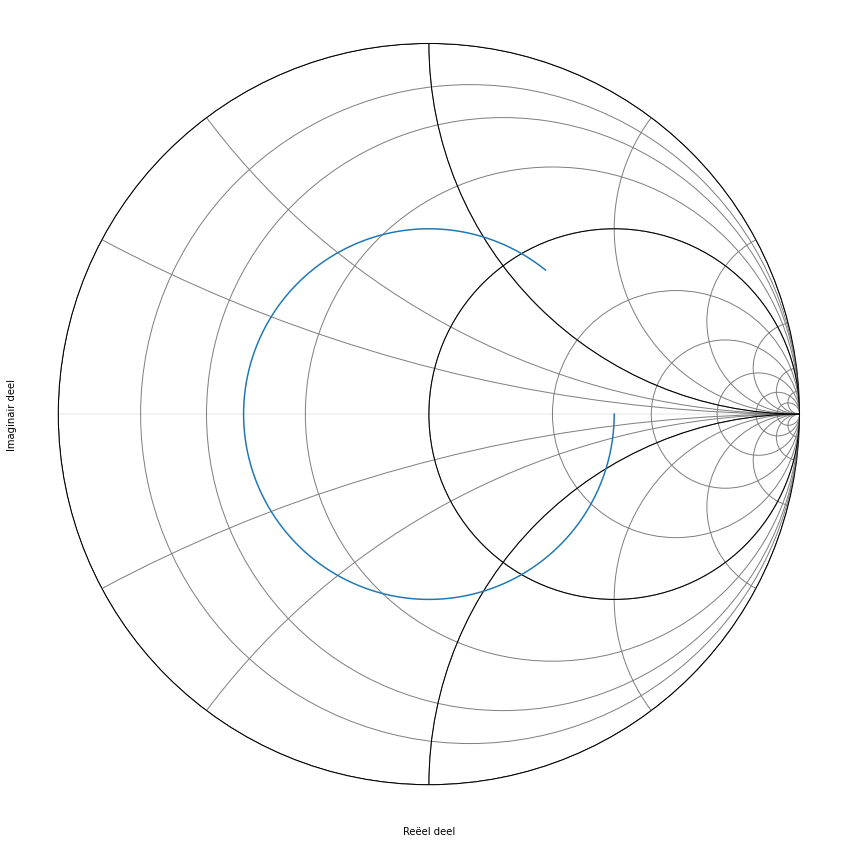

In [120]:
Z_L = 150
Z_0 = 50
f_0_str = '600MHz'
freq = rf.Frequency(start=500, stop=700, npoints=31, unit='MHz')
beta = freq.w/rf.c
line = rf.DefinedGammaZ0(freq, gamma=1j*beta, z0=Z_0)
zlijn=[line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(310)]
gamma=[(zl-Z_0)/(zl+Z_0) for zl in zlijn]
fig,ax=plt.subplots(figsize=(25,15))
rf.plotting.plot_smith(gamma, x_label=r"Reëel deel", y_label='Imaginair deel', title='',ax=ax)

We zoomen vervolgens in op het deel van de cirkel die de eenheidscirkel snijdt.

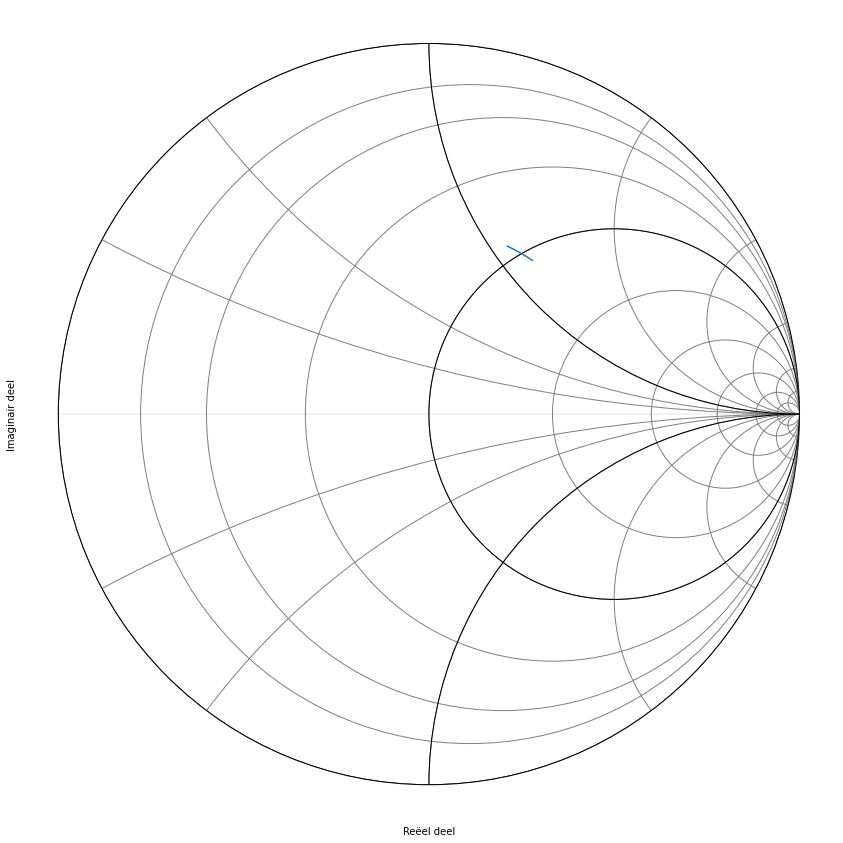

In [121]:
Z_L = 150
Z_0 = 50
f_0_str = '600MHz'
freq = rf.Frequency(start=500, stop=700, npoints=301, unit='MHz')
beta = freq.w/rf.c
line = rf.DefinedGammaZ0(freq, gamma=1j*beta, z0=Z_0)
zlijn=[line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(295,305)]
gamma=[(zl-Z_0)/(zl+Z_0) for zl in zlijn]
fig,ax=plt.subplots(figsize=(15,15))
rf.plotting.plot_smith(gamma, x_label='Reëel deel', y_label='Imaginair deel', title='',ax=ax)

We draaien tegenwijzerzin over een afstand van $300^o$= 0.416 $\lambda$ = 10.41cm.    (($\lambda$= 25 cm is gegeven)

De nieuwe z = 1 + j 1.15. Daaruit volgt dat Z = 50 Ohm + j 57.5 Ohm. Het complexe deel van deze impedantie kunnen we compenseren door een condensator met impedantie van ongeveer - j 57.5 Ohm  toe te voegen. Als we het helemaal juist willen hebben kunnen we in de array van zlijn juist gaan kijken waar het reele deel 50 Ohm wordt en wat we dan als complex deel over houden.

$$ \frac{1}{j \omega C}= - j 57.5 \Omega$$

In [122]:
zlijn

[(45.32369795699738+54.76962719429843j),
 (46.203384529325824+55.36976924510545j),
 (47.10999050605558+55.96707852713012j),
 (48.044373801224154+56.56088559760718j),
 (49.00741173990231+57.15046413815089j),
 (50.00000000000001+57.73502691896258j),
 (51.0230512899164+58.31372153035076j),
 (52.07749372723771+58.885625877309565j),
 (53.16426888011713+59.4497434347881j),
 (54.28432942916646+60.00499826364585j)]

In [20]:
1/57.73502691896258/6e8/2/np.pi

4.594407461848266e-12

$$ \omega= 2 \pi 600 10^6 Hz  $$

$$ C= 4.59 pF  $$


<div class="alert alert-success">
De optimale condensatorwaarde in serie wordt dus  4.59 pF en de nodige lengte van de coax tussen de antenne en de aanpassing is 10.4 cm
<\div>

<div class="alert alert-warning">
Toe te voegen: een schema van het uitendelijk aangepaste circuit
<\div>

### Oplossing 2: Bijplaatsen van een inductantie in serie

We plaatsen $\frac{Z_L}{Z_0}=3$ op de Smith kaart en we zoeken waar we de r=1 cirkel snijden in het onderste deel van de kaart.

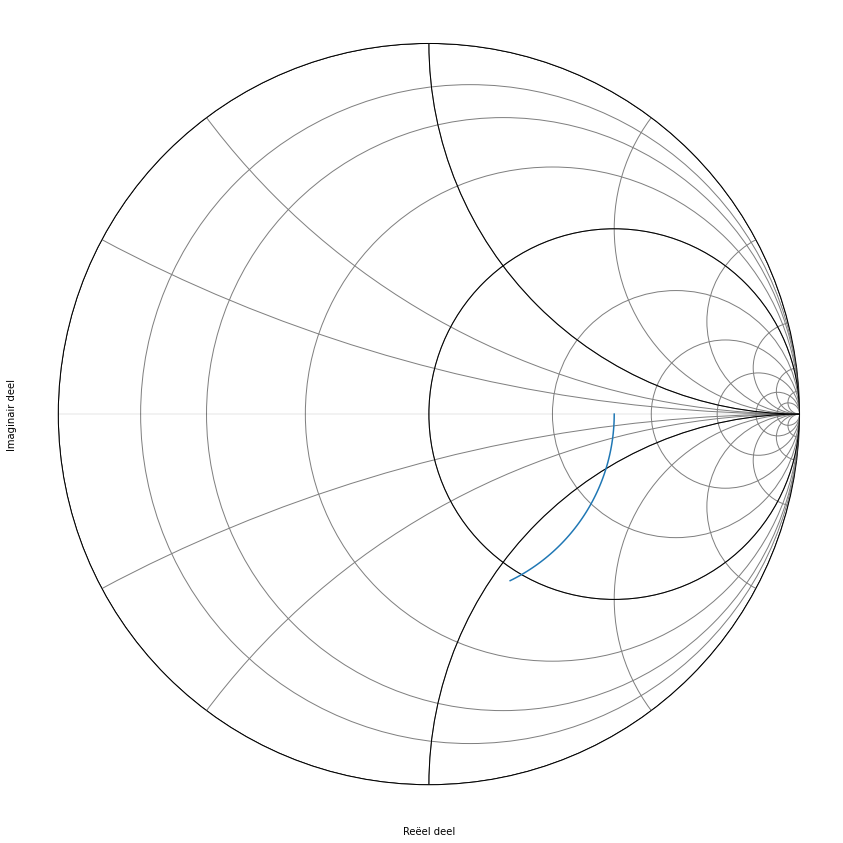

In [124]:
Z_L = 150
Z_0 = 50
f_0_str = '600MHz'
freq = rf.Frequency(start=500, stop=700, npoints=301, unit='MHz')
beta = freq.w/rf.c
line = rf.DefinedGammaZ0(freq, gamma=1j*beta, z0=Z_0)
zlijn=[line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(65)]
gamma=[(zl-Z_0)/(zl+Z_0) for zl in zlijn]
fig,ax=plt.subplots(figsize=(25,15))
rf.plotting.plot_smith(gamma, x_label='Reëel deel', y_label='Imaginair deel', title='',ax=ax)

We zoomen vervolgens in op het deel van de cirkel die de eenheidscirkel snijdt.

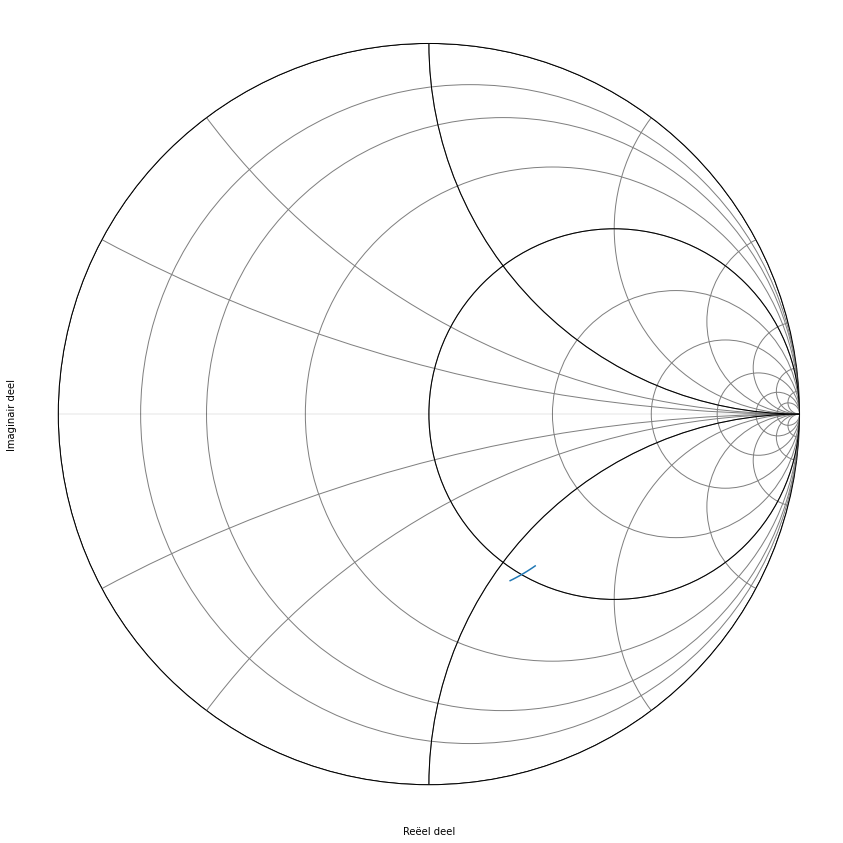

In [102]:
Z_L = 150
Z_0 = 50
f_0_str = '600MHz'
freq = rf.Frequency(start=500, stop=700, npoints=301, unit='MHz')
beta = freq.w/rf.c
line = rf.DefinedGammaZ0(freq, gamma=1j*beta, z0=Z_0)
zlijn=[line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(55,65)]
gamma=[(zl-Z_0)/(zl+Z_0) for zl in zlijn]
fig,ax=plt.subplots(figsize=(25,15))
rf.plotting.plot_smith(gamma, x_label='Reëel deel', y_label='Imaginair deel', title='',ax=ax)

In [103]:
zlijn

[(55.43863640365656-60.55022979019919j),
 (54.284329429166505-60.00499826364588j),
 (53.16426888011716-59.449743434788125j),
 (52.07749372723772-58.885625877309536j),
 (51.02305128991642-58.31372153035077j),
 (50.00000000000001-57.73502691896258j),
 (49.00741173990236-57.15046413815092j),
 (48.04437380122418-56.56088559760718j),
 (47.109990506055595-55.96707852713013j),
 (46.203384529325824-55.36976924510545j)]

De nieuwe z = 1 - j 1.15. Daaruit volgt dat Z = 50 Ohm - j 57.5 Ohm. Het complexe deel van deze impedantie kunnen we compenseren door een spoel met impedantie van ongeveer  j 57.5 Ohm  toe te voegen. Als we het helemaal juist willen hebben kunnen we in de array van zlijn juist gaan kijken waar het reele deel 50 Ohm wordt en wat we dan als complex deel over houden.

$$ j \omega L=  j 57.5 \Omega$$

In [104]:
57.73502691896258/2/np.pi/6e8

1.5314691539494226e-08

<div class="alert alert-success">
De optimale inductantiewaarde in serie wordt dus  15 nH
<\div>

<div class="alert alert-warning">
Toe te voegen: een schema van het uitendelijk aangepaste circuit
<\div>

### Oplossing 3: Bijplaatsen van een capaciteit in parallel

We plaatsen $\frac{Z_L}{Z_0}=3$ op de Smith kaart en we zoeken waar we de y=1 cirkel snijden in het bovenste deel van de kaart.

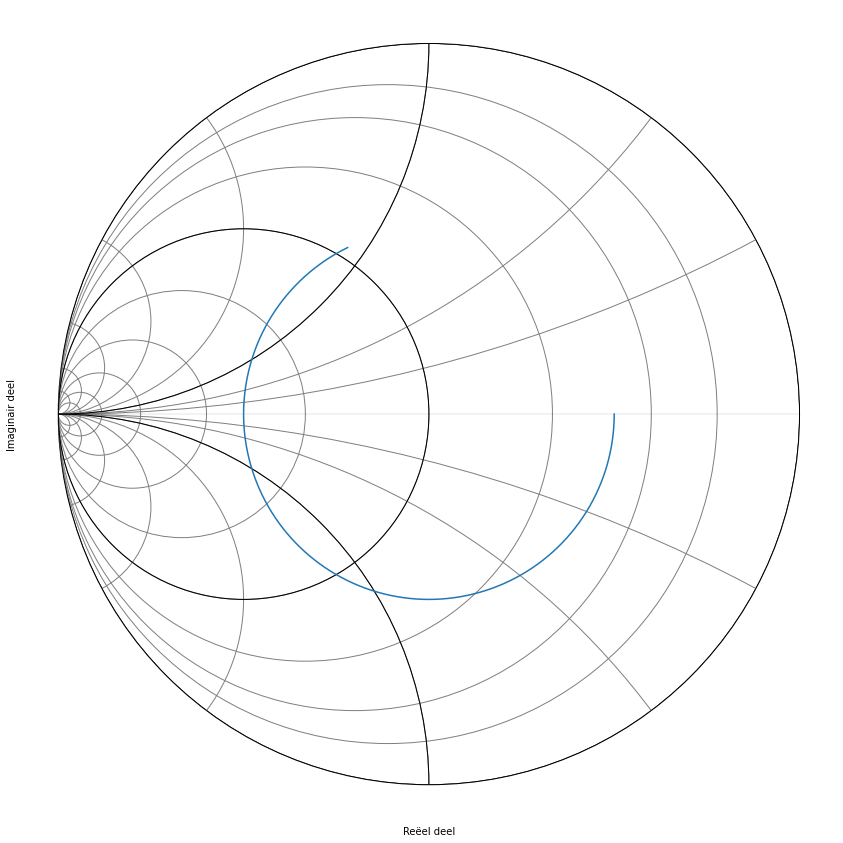

In [105]:
Z_L = 150
Z_0 = 50
f_0_str = '600MHz'
freq = rf.Frequency(start=500, stop=700, npoints=301, unit='MHz')
beta = freq.w/rf.c
line = rf.DefinedGammaZ0(freq, gamma=1j*beta, z0=Z_0)
zlijn=[line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,245)]
gamma=[(zl-Z_0)/(zl+Z_0) for zl in zlijn]
fig,ax=plt.subplots(figsize=(25,15))
rf.plotting.plot_smith(gamma , chart_type='y',x_label='Reëel deel', y_label='Imaginair deel', title='',ax=ax)

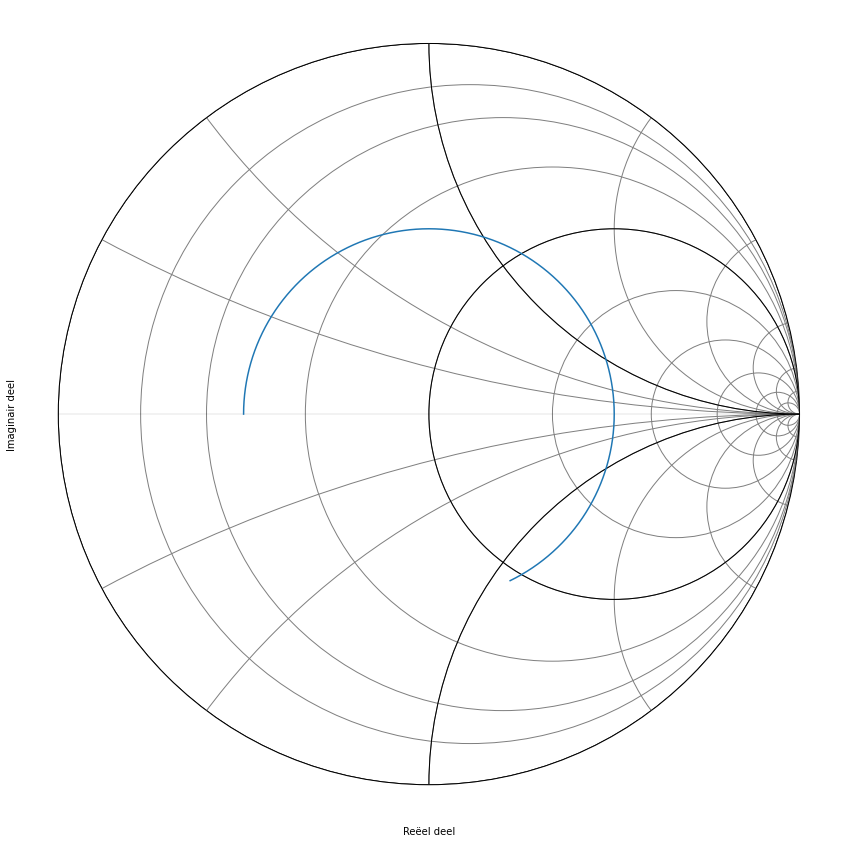

In [106]:
Z_L = 150
Z_0 = 50
f_0_str = '600MHz'
freq = rf.Frequency(start=500, stop=700, npoints=301, unit='MHz')
beta = freq.w/rf.c
line = rf.DefinedGammaZ0(freq, gamma=1j*beta, z0=Z_0)
Y_0=1/Z_0
ylijn=[1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,245)]
gamma=[(yl-Y_0)/(yl+Y_0) for yl in ylijn]
fig,ax=plt.subplots(figsize=(25,15))
rf.plotting.plot_smith(gamma , x_label='Reëel deel', y_label='Imaginair deel', title='',ax=ax)

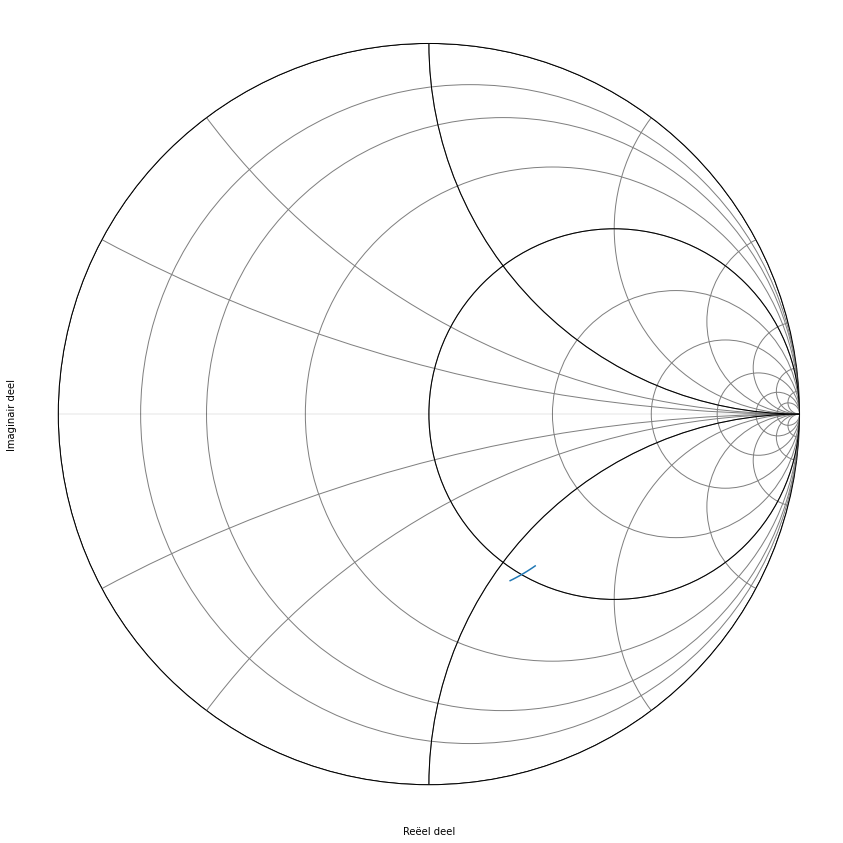

In [107]:
Z_L = 150
Z_0 = 50
f_0_str = '600MHz'
freq = rf.Frequency(start=500, stop=700, npoints=301, unit='MHz')
beta = freq.w/rf.c
line = rf.DefinedGammaZ0(freq, gamma=1j*beta, z0=Z_0)
Y_0=1/Z_0
ylijn=[1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(235,245)]
gamma=[(yl-Y_0)/(yl+Y_0) for yl in ylijn]
fig,ax=plt.subplots(figsize=(25,15))
rf.plotting.plot_smith(gamma , x_label='Reëel deel', y_label='Imaginair deel', title='',ax=ax)

In [108]:
ylijn

[(0.022175454561462637-0.02422009191607969j),
 (0.02171373177166662-0.024001999305458366j),
 (0.021265707552046854-0.023779897373915247j),
 (0.020830997490895092-0.023554250350923827j),
 (0.020409220515966563-0.023325488612140302j),
 (0.020000000000000014-0.023094010767585035j),
 (0.01960296469596094-0.02286018565526037j),
 (0.019217749520489665-0.02262435423904287j),
 (0.018843996202422237-0.022386831410852053j),
 (0.018481353811730338-0.02214790769804218j)]

In [109]:
0.023094010767585035/2/np.pi/6e8

6.12587661579769e-12

<div class="alert alert-success">
De optimale condensatorwaarde in parallel wordt dus  6.12 pF
<\div>

<div class="alert alert-warning">
Toe te voegen: een schema van het uitendelijk aangepaste circuit
<\div>

### Oplossing 4: Bijplaatsen van een spoel in parallel

We plaatsen $\frac{Z_0}{Z_L}=\frac{1}{3}$ op de Smith kaart en we zoeken waar we de y=1 cirkel snijden in het bovenste deel van de kaart.

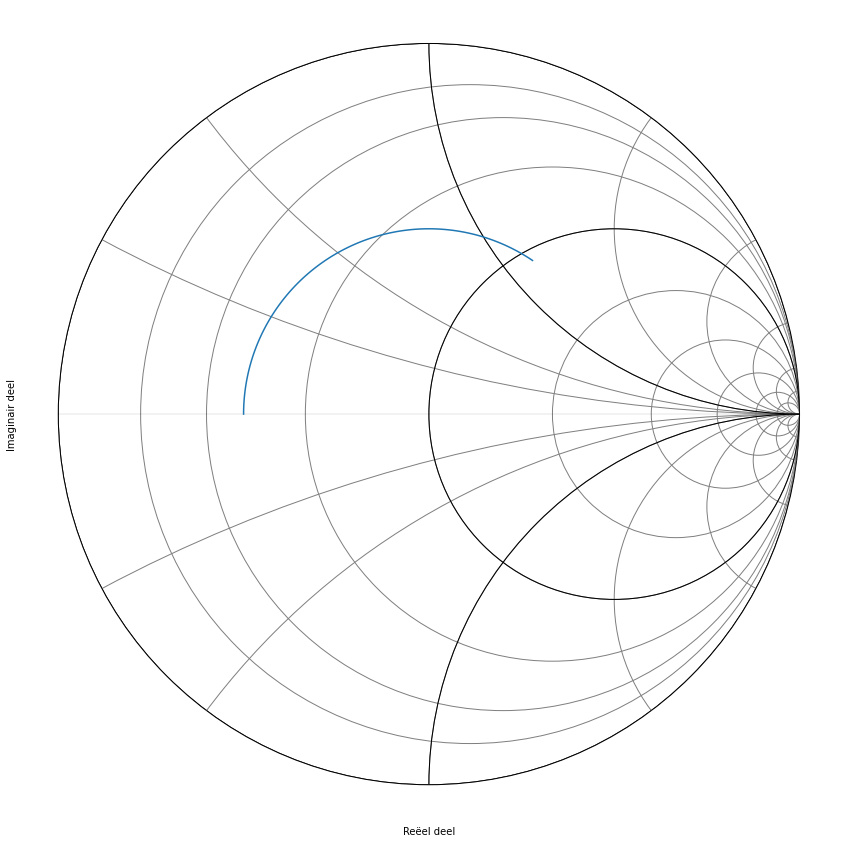

In [110]:
Z_L = 150
Z_0 = 50
f_0_str = '600MHz'
freq = rf.Frequency(start=500, stop=700, npoints=301, unit='MHz')
beta = freq.w/rf.c
line = rf.DefinedGammaZ0(freq, gamma=1j*beta, z0=Z_0)
Y_0=1/Z_0
ylijn=[1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,125)]
gamma=[(yl-Y_0)/(yl+Y_0) for yl in ylijn]
fig,ax=plt.subplots(figsize=(25,15))
rf.plotting.plot_smith(gamma , x_label='Reëel deel', y_label='Imaginair deel', title='',ax=ax)

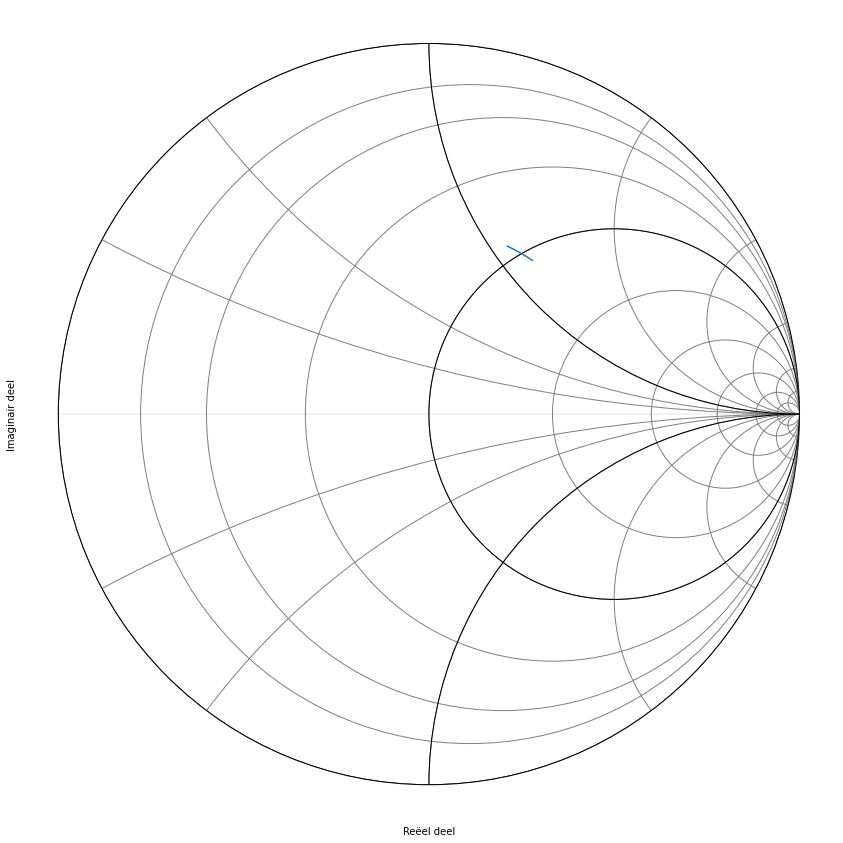

In [111]:
Z_L = 150
Z_0 = 50
f_0_str = '600MHz'
freq = rf.Frequency(start=500, stop=700, npoints=301, unit='MHz')
beta = freq.w/rf.c
line = rf.DefinedGammaZ0(freq, gamma=1j*beta, z0=Z_0)
Y_0=1/Z_0
ylijn=[1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(115,125)]
gamma=[(yl-Y_0)/(yl+Y_0) for yl in ylijn]
fig,ax=plt.subplots(figsize=(25,15))
rf.plotting.plot_smith(gamma , x_label='Reëel deel', y_label='Imaginair deel', title='',ax=ax)

In [112]:
ylijn

[(0.018129479182798947+0.02190785087771937j),
 (0.01848135381173033+0.022147907698042188j),
 (0.018843996202422233+0.022386831410852053j),
 (0.019217749520489668+0.022624354239042865j),
 (0.019602964695960946+0.02286018565526037j),
 (0.019999999999999993+0.02309401076758503j),
 (0.020409220515966563+0.023325488612140306j),
 (0.020830997490895082+0.02355425035092382j),
 (0.021265707552046865+0.02377989737391525j),
 (0.021713731771666595+0.024001999305458342j)]

In [113]:
1/0.02309401076758503/2/np.pi/6e8

1.148601865462067e-08

<div class="alert alert-success">
De optimale inductantiewaarde in parallel wordt dus  1.15 nH
</div>

<div class="alert alert-warning">
Toe te voegen: een schema van het uitendelijk aangepaste circuit
<\div>

### Oplossing 5: Oplossing 3 waarbij de condensator vervangen is door een open transmissielijn


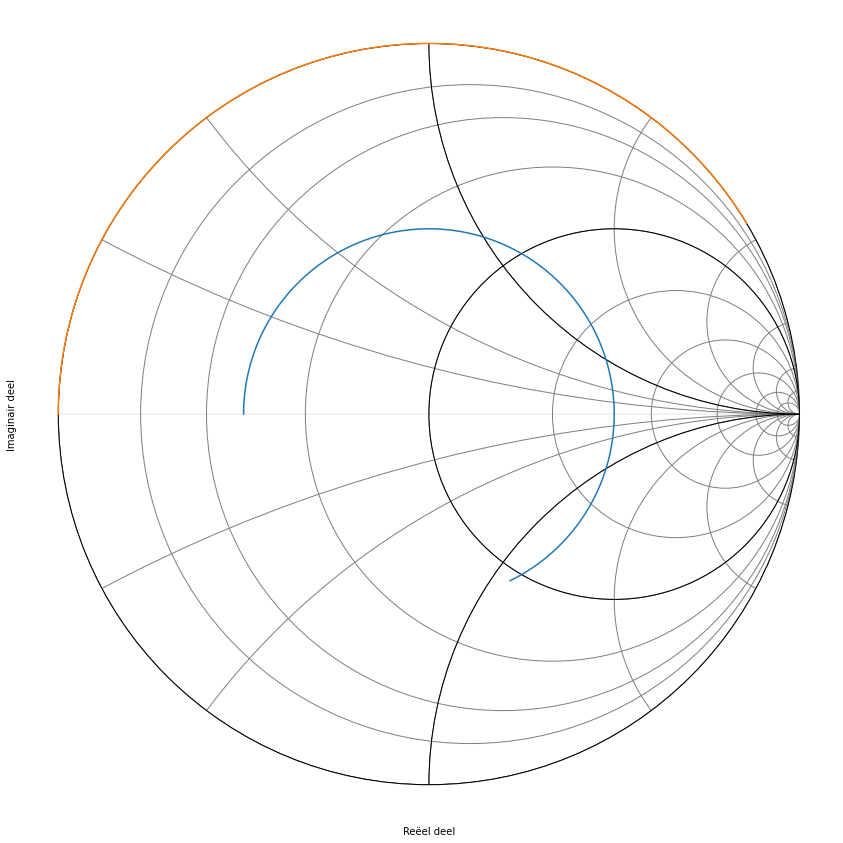

In [114]:
Z_L = 150
Z_0 = 50
f_0_str = '600MHz'
freq = rf.Frequency(start=500, stop=700, npoints=301, unit='MHz')
beta = freq.w/rf.c
line = rf.DefinedGammaZ0(freq, gamma=1j*beta, z0=Z_0)
Y_0=1/Z_0
ylijn=[1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,245)]
yopenlijn=[1/line.delay_load(1, i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(0,150)]
gamma=[(yl-Y_0)/(yl+Y_0) for yl in ylijn]
gammaopen=[(yl-Y_0)/(yl+Y_0) for yl in yopenlijn]

fig,ax=plt.subplots(figsize=(25,15))
rf.plotting.plot_smith(gamma , x_label='Reëel deel', y_label='Imaginair deel', title='',ax=ax)
rf.plotting.plot_smith(gammaopen , x_label='Reëel deel', y_label='Imaginair deel', title='',ax=ax)

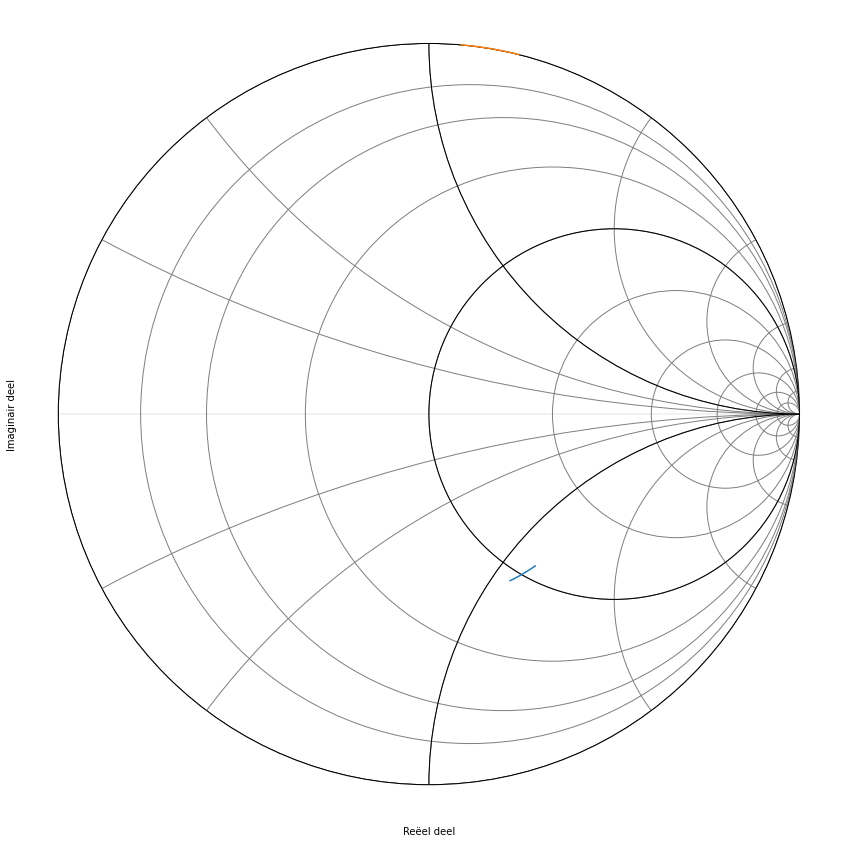

In [115]:
Z_L = 150
Z_0 = 50
f_0_str = '600MHz'
freq = rf.Frequency(start=500, stop=700, npoints=301, unit='MHz')
beta = freq.w/rf.c
line = rf.DefinedGammaZ0(freq, gamma=1j*beta, z0=Z_0)
Y_0=1/Z_0
ylijn=[1/line.delay_load(rf.zl_2_Gamma0(Z_0, Z_L), i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(235,245)]
yopenlijn=[1/line.delay_load(1, i/2)[f_0_str][0].z[0][0][0]  for i in np.arange(95,105)]
gamma=[(yl-Y_0)/(yl+Y_0) for yl in ylijn]
gammaopen=[(yl-Y_0)/(yl+Y_0) for yl in yopenlijn]

fig,ax=plt.subplots(figsize=(25,15))
rf.plotting.plot_smith(gamma , x_label='Reëel deel', y_label='Imaginair deel', title='',ax=ax)
rf.plotting.plot_smith(gammaopen , x_label='Reëel deel', y_label='Imaginair deel', title='',ax=ax)

In [116]:
ylijn

[(0.022175454561462637-0.02422009191607969j),
 (0.02171373177166662-0.024001999305458366j),
 (0.021265707552046854-0.023779897373915247j),
 (0.020830997490895092-0.023554250350923827j),
 (0.020409220515966563-0.023325488612140302j),
 (0.020000000000000014-0.023094010767585035j),
 (0.01960296469596094-0.02286018565526037j),
 (0.019217749520489665-0.02262435423904287j),
 (0.018843996202422237-0.022386831410852053j),
 (0.018481353811730338-0.02214790769804218j)]

In [117]:
[y.imag for y in yopenlijn]

[0.021826170021385427,
 0.022212250296583847,
 0.02260588772723506,
 0.023007368144420188,
 0.02341699132225079,
 0.023835071851884205,
 0.024261940081858654,
 0.024697943130701023,
 0.0251434459783791,
 0.02559883264386157]

Hieruit blijkt dat een open transmissielijn met de lengte van $\frac{98}{360} \frac{\lambda}{2}$ de beste aanpassing geeft.

In [118]:
98/360/2*25

3.4027777777777777

<div class="alert alert-success">
Het stukje open coax dat we moeten voorzien is dus: 3.4 cm
<\div>

<div class="alert alert-warning">
Toe te voegen: een schema van het uitendelijk aangepaste circuit +
Oplossingen 6,7,en 8
<\div>